### **Abstract** ✅

---



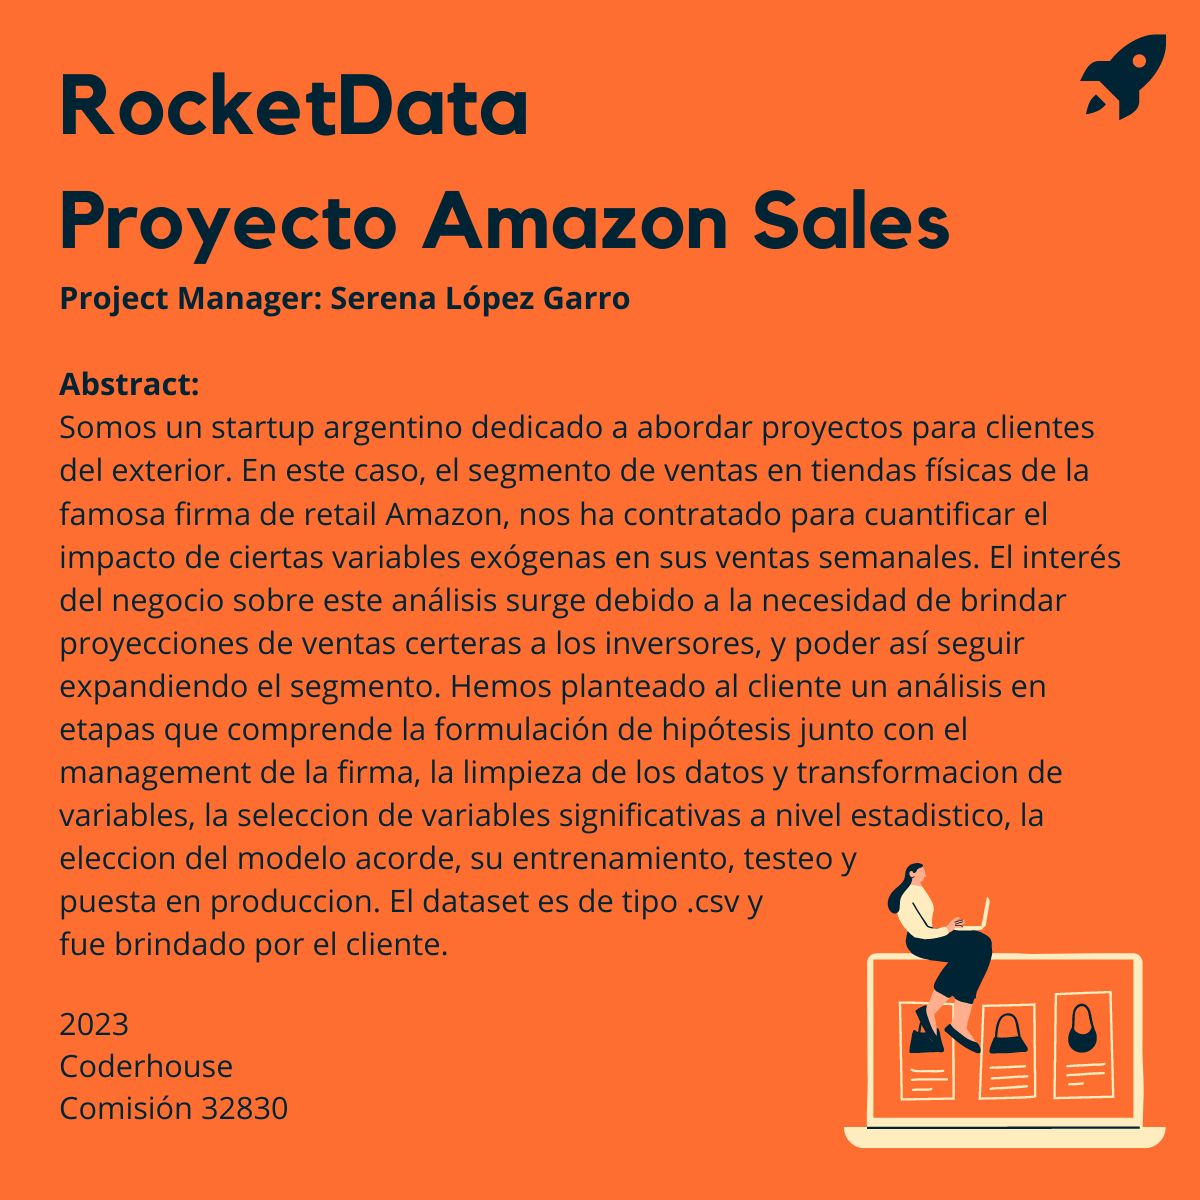

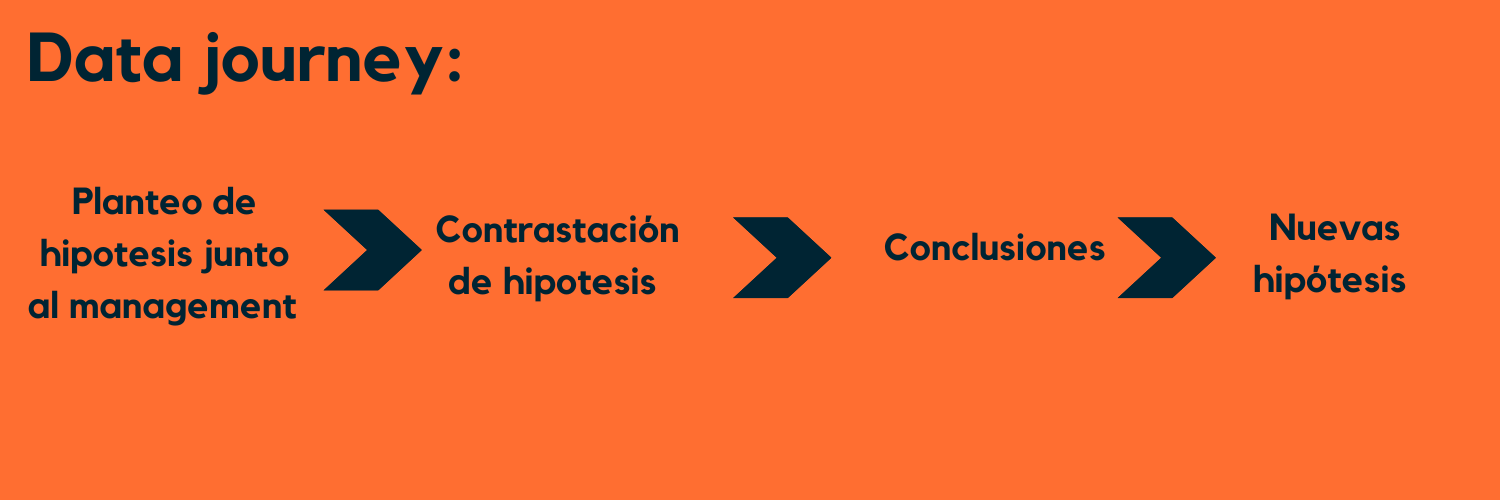

In [ ]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns 
import statistics
import statsmodels.api as sm

In [ ]:
#Importando el DF
from google.colab import drive
import os
drive.mount('/content/drive',force_remount=True)
df_1=pd.read_csv('/content/drive/MyDrive/Data science - Sere/Data Science/Datasets/amazon_sales_dataset.csv')
df_1.index = df_1['Date']

Mounted at /content/drive


### **Column Description**✅

---





*   Store - the store number
*   Dept - the department number
*   Date - the week
*   Weekly_Sales - sales for the given department in the given store
*   IsHoliday - whether the week is a special holiday week
*   Temperature - average temperature in the region
*   Fuel_Price - cost of fuel in the region
*   MarkDown1-5 - anonymized data related to promotional markdowns that Amazon is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
*   CPI - the consumer price index
*   Unemployment - the unemployment rate



In [ ]:
df_1.head()

,Date,Store,Dept,Unnamed: 3,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,...,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,,
05/02/2019,05/02/2019,1,1,05/02/2019,24924.50,A,151315,42.31,2.572,211.096358,...,0,2019,2,5,57592.12,14537.37,22513.322940,18535.48,9854.349032,0.0
05/02/2019,05/02/2019,9,97,05/02/2019,668.48,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
05/02/2019,05/02/2019,9,85,05/02/2019,693.87,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
05/02/2019,05/02/2019,8,80,05/02/2019,8654.60,A,155078,34.14,2.572,214.471451,...,0,2019,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
05/02/2019,05/02/2019,9,55,05/02/2019,11123.56,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


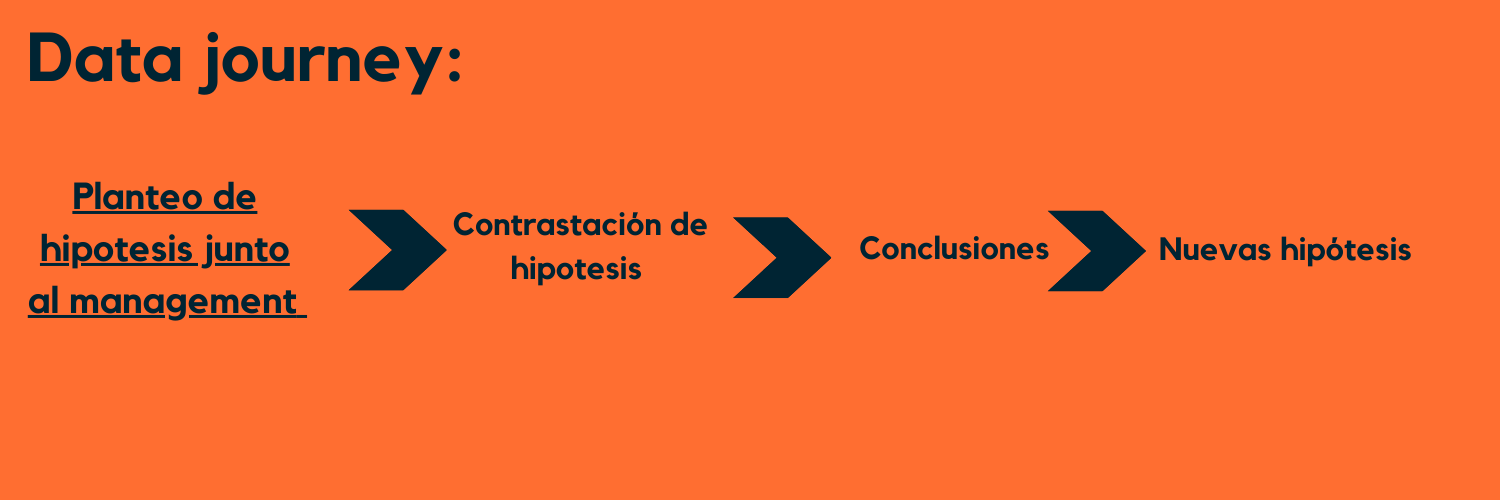

### **Planteo de hipotesis** ✅

---



Hemos trabajado con el management del segmento para crear las siguientes hipotesis sobre el caso de estudio:

❗ Hipotesis 1: el CPI tiene una influencia negativa en las ventas semanales. Esto puede traducirse en que el beta o coeficiente asociado al CPI es negativo.


$$ H_0: \beta^c < 0$$ 
$$ H_a: \beta^c \geq  0$$


❗ Hipotesis 2: el tamaño de la tienda no influye en las ventas semanales. En este caso la hipotesis inicial es que el coeficiente que acompaña a las ventas semanales, es distinto de cero y por lo tanto es significativo. La hipotesis alternativa, por lo tanto, plantea el caso contrario y la no relacion entre las variables.

$$ H_0: \beta^s \neq 0$$ 
$$ H_a: \beta^s =  0$$


❗ Hipotesis 3: el precio de la nafta (fuel) influye de manera negativa en las ventas. El management afirma que la localizacion de los locales en lugares suburbanos es una ventaja y una desventaja al mismo tiempo, poruqe las recientes subas del precio de la nafta generan que las personas decidan acudir a tiendas a las que puedan ir caminando.

$$ H_0: \beta^f < 0$$ 
$$ H_a: \beta^f \geq  0$$


❗ Hipotesis 4: la temperatura atmosferica promedio no influye en las ventas semanales. En este caso la hipotesis inicial es que el coeficiente que acompaña a la temperatura, es distinto de cero y por lo tanto es significativo. La hipotesis alternativa, por lo tanto, plantea el caso contrario y la no relacion entre las variables.

$$ H_0: \beta^t \neq 0$$ 
$$ H_a: \beta^t =  0$$


❗ Hipotesis 5: el indice de desempleo influye de manera negativa en las ventas. El management es consciente de que los productos que se venden en las tiendas no son de primera necesidad, y que por ende una suba en el indice de desempleo impacta directamente en las ventas, ya que los clientes tienen menos ingreso disponible para gastar.

$$ H_0: \beta^u < 0$$ 
$$ H_a: \beta^u \geq  0$$

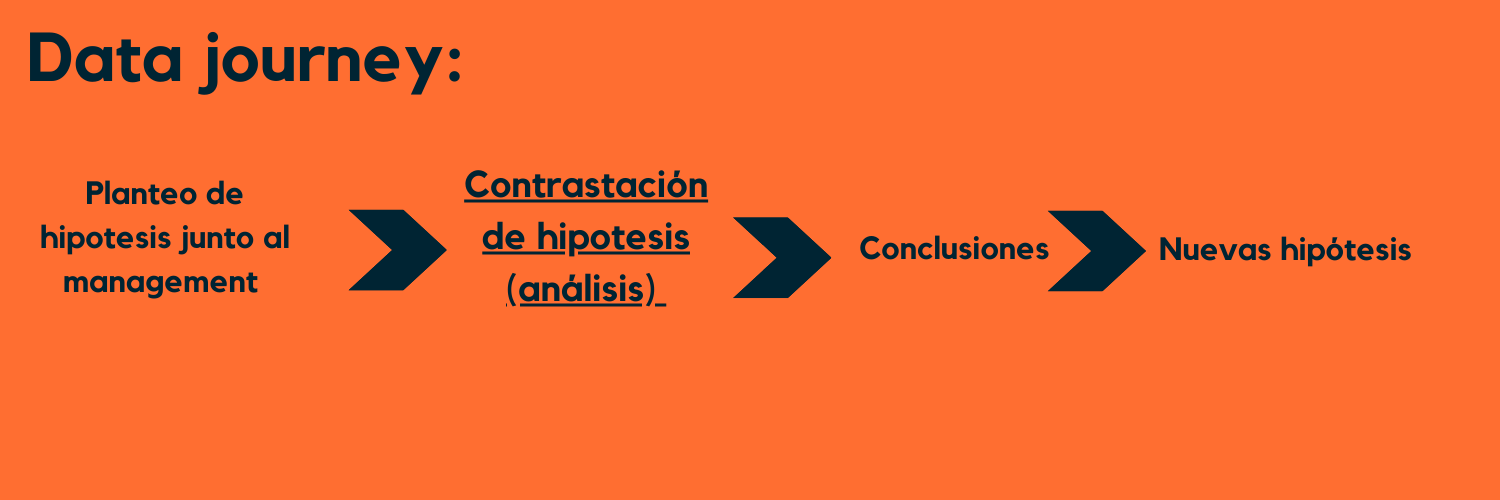

#EDA ✅

#Exploratory Data Analysis:
👷
---



### **Feature Engineering**

---

✅

In [ ]:
#Haciendo nombres de columnas mas amigables

df_1 = df_1.rename (columns= {'Unemployment': 'Unemployment_Rate' }) 
df_1.head()

,Date,Store,Dept,Unnamed: 3,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,...,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,,
05/02/2019,05/02/2019,1,1,05/02/2019,24924.50,A,151315,42.31,2.572,211.096358,...,0,2019,2,5,57592.12,14537.37,22513.322940,18535.48,9854.349032,0.0
05/02/2019,05/02/2019,9,97,05/02/2019,668.48,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
05/02/2019,05/02/2019,9,85,05/02/2019,693.87,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
05/02/2019,05/02/2019,8,80,05/02/2019,8654.60,A,155078,34.14,2.572,214.471451,...,0,2019,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
05/02/2019,05/02/2019,9,55,05/02/2019,11123.56,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [ ]:
#Quitando valores no numericos, sin identificar o indices de los cuales no tenemos background tecnico.

df_1 = df_1.drop(['Type','Unnamed: 3','Total_MarkDown'], axis=1)
df_1.head()

,Date,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment_Rate,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,
05/02/2019,05/02/2019,1,1,24924.50,151315,42.31,2.572,211.096358,8.106,0,2019,2,5,57592.12,14537.37,22513.322940,18535.48,9854.349032
05/02/2019,05/02/2019,9,97,668.48,125833,38.01,2.572,214.655459,6.415,0,2019,2,5,766.93,-9.92,372.655556,371.05,290.954675
05/02/2019,05/02/2019,9,85,693.87,125833,38.01,2.572,214.655459,6.415,0,2019,2,5,2512.14,110.56,876.629441,824.04,307.436056
05/02/2019,05/02/2019,8,80,8654.60,155078,34.14,2.572,214.471451,6.299,0,2019,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
05/02/2019,05/02/2019,9,55,11123.56,125833,38.01,2.572,214.655459,6.415,0,2019,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


Text(0.5, 1.0, 'Histograma de fuel price semanal')

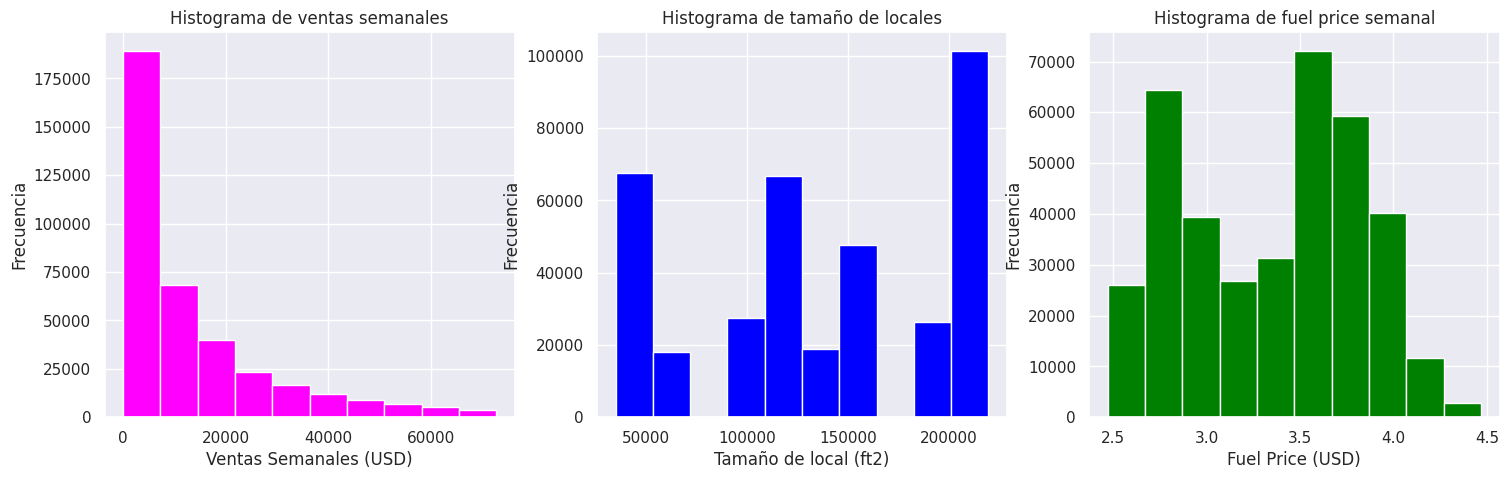

In [ ]:
#Graficando la distribucion de las variables

f, axs = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw=dict(width_ratios=[4, 4,4]))

sns.set_theme(style="whitegrid")

axs[0].hist(x= df_1.Weekly_Sales, bins=None, density=False, orientation='vertical', color='magenta')
axs[0].set_xlabel('Ventas Semanales (USD)')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Histograma de ventas semanales')

axs[1].hist(x= df_1.Size, bins=None, density=False, orientation='vertical', color='blue')
axs[1].set_xlabel('Tamaño de local (ft2)')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Histograma de tamaño de locales')

axs[2].hist(x= df_1.Fuel_Price, bins=None, density=False, orientation='vertical', color='green')
axs[2].set_xlabel('Fuel Price (USD)')
axs[2].set_ylabel('Frecuencia')
axs[2].set_title('Histograma de fuel price semanal')

### **Conclusiones sobre la distribucion de variables**

---



❗ Ventas: la mayor cantidad de ventas semanales se encuentran en el intervalo que va de 0 a USD 20K.


❗ Tamaño de los locales: al ser una variable discreta, medida en pies2, es esperable que el histograma no muestre una distribucion estadistica reconocible. Sin embargo, podemos observar que priman los locales extensos.



❗ Fuel price: la distribucion de datos del precio de la nafta muestra que los datos estan bastante dispersos ya que que hay mas de un intervalo con alta frecuencia absoluta acumulada. 


❗ Temperatura semanal: esta variable tiene una distribucion que se asemeja a una distribucion normal, con un sesgo hacia temperaturas mayores a Fº60.


❗ CPI: en la mayoria de las semanas, el CPI se encontro dentro de un rango que va de los 120 a los 140 puntos basicos. Tambien destacable la cantidad de relevamientos donde el CPI se encontro en un intervalo que va desde los 210 a los 220 puntos basicos.


❗ Tasa de desempleo: al igual que la temperatura, la tasa de desempleo parece seguir una distribucion normal. La mayor cantidad de datos se encuentran cercanos a la media, que esta al rededor de 8%. 



### **Eleccion de variables significativas**

---
✅

Como el dataset no dispone de una gran cantidad de variables, vamos a incluir en el analisis todas las que podamos. Sin embargo, hemos hecho una limpieza de variables que estan correlacionadas y pueden causar multicolinealidad en un modelo de Machine Learning. Estas variables son las medidas de tendencia central que se calculan a partir de las ventas semanales (media, mediana), las medidas de dispersion (std) y los maximos y minimos. 

Tambien hemos quitado del data frame las columnas que hacen referencia a una fecha, ya que tenemos el index "date". Por ultimo, quitamos el valor booleano "is holiday" para poder dejar variables cuantitativas que puedan alimentar un modelo lineal.

In [ ]:
df_2 = df_1[[
  'Weekly_Sales',
  'Size',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment_Rate']]

df_2.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment_Rate
Date,,,,,,
05/02/2019,24924.50,151315,42.31,2.572,211.096358,8.106
05/02/2019,668.48,125833,38.01,2.572,214.655459,6.415
05/02/2019,693.87,125833,38.01,2.572,214.655459,6.415
05/02/2019,8654.60,155078,34.14,2.572,214.471451,6.299
05/02/2019,11123.56,125833,38.01,2.572,214.655459,6.415


### Estudiando la variabilidad de nuestra variable objetivo

---
✅

El objetivo de este estudio es medir el impacto de variables que son exogenas, sobre una variable endogena. En este caso nuestra variable endogena es la venta semanal. Dado que vamos a construir un modelo utilizando a esta variable endogena como variable objetivo, es importante conocer que tan volatil o dispersa es.


Text(0.5, 1.0, 'Histograma de unemployment rate semanal')

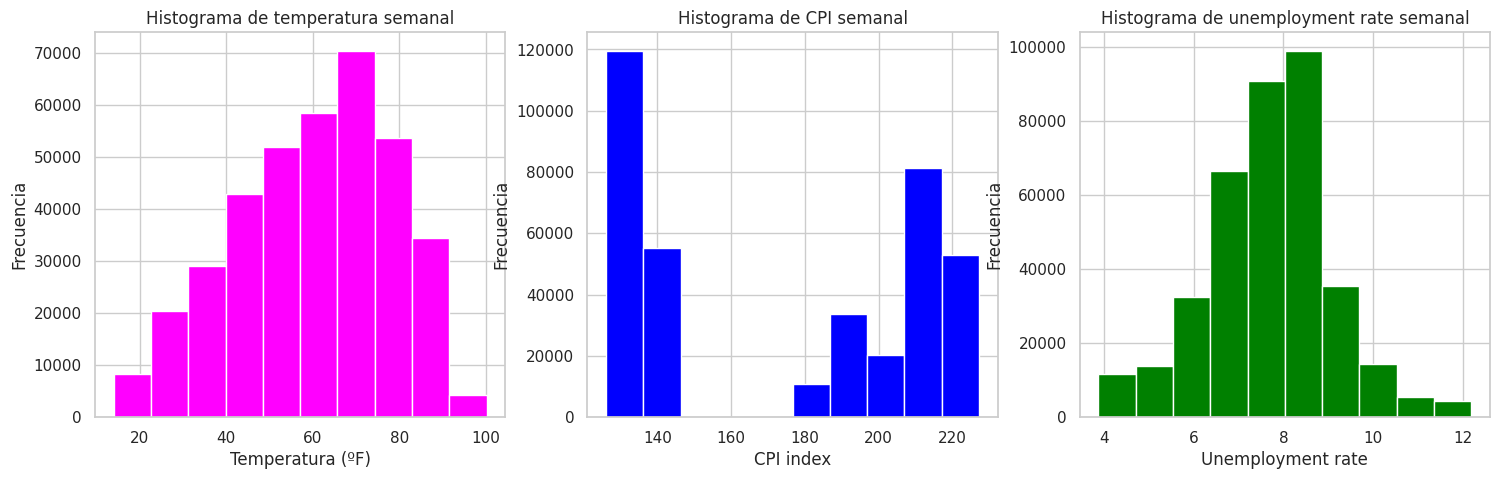

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw=dict(width_ratios=[4, 4,4]))

sns.set_theme(style="whitegrid")

axs[0].hist(x= df_1.Temperature, bins=None, density=False, orientation='vertical', color='magenta')
axs[0].set_xlabel('Temperatura (ºF)')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Histograma de temperatura semanal')

axs[1].hist(x= df_1.CPI, bins=None, density=False, orientation='vertical', color='blue')
axs[1].set_xlabel('CPI index')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Histograma de CPI semanal')

axs[2].hist(x= df_1.Unemployment_Rate, bins=None, density=False, orientation='vertical', color='green')
axs[2].set_xlabel('Unemployment rate')
axs[2].set_ylabel('Frecuencia')
axs[2].set_title('Histograma de unemployment rate semanal')

In [ ]:
#Expresamos los datos en funcion de su desvio sobre la media

datos_z=pd.DataFrame()
for j in df_2.columns[0:]:
  datos_z[j] = (df_2[j] - df_2[j].mean()) / df_2[j].std()
datos_z['WeeklySales_x']= datos_z['Weekly_Sales'].apply(lambda x: 'Atipico' if (x>2 or x<-2) else 'Normal')
datos_z.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment_Rate,WeeklySales_x
Date,,,,,,,
05/02/2019,0.769648,0.274057,-0.989961,-1.676938,0.968001,0.295174,Normal
05/02/2019,-0.803662,-0.145014,-1.227361,-1.676938,1.059451,-0.920909,Normal
05/02/2019,-0.802015,-0.145014,-1.227361,-1.676938,1.059451,-0.920909,Normal
05/02/2019,-0.285661,0.335943,-1.441022,-1.676938,1.054723,-1.004330,Normal
05/02/2019,-0.125518,-0.145014,-1.227361,-1.676938,1.059451,-0.920909,Normal


In [ ]:
Count_WS_X = datos_z.groupby(['WeeklySales_x'])[['WeeklySales_x']].count()
print(Count_WS_X)

               WeeklySales_x
WeeklySales_x               
Atipico                24442
Normal                349805


In [ ]:
Count_WS_category = [24442,349805]
WS_category = ['Atipico','Normal']

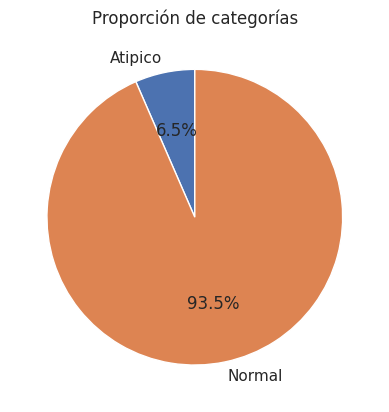

In [ ]:
#Graficamos

fig, ax = plt.subplots()
ax.pie(Count_WS_category, labels=WS_category, autopct='%1.1f%%', startangle=90)
ax.set_title('Proporción de categorías')
plt.show()

### Conclusion sobre la variabilidad

---

Nuestra variable objetivo tiene solo un 6.5% de datos que estan a mas de dos desvios de la media. Por lo tanto, podemos concluir que las ventas semanales muestran poca variabilidad para el periodo analizado.

### Aplicando transformaciones y escalaciones.

---
✅

Dado que hay una gran diferencia en la escala de la variable objetivo (por estar medida en miles de USD) y la variabl que representa el tamaño de los locales (por ser una variable espacial) respecto de las demas variables, que son indices o datos que tienen un limite finito (como las temperaturas), es importante transformarlas para que no tengan mas "peso" en nuestro modelo. Para ello, vamos a realizarles dos transformaciones acompañadas por dos escalaciones distintas.

1) Primero, vamos a combinar la transformacion logaritmica sobre las variables con dimensiones mas "grandes" y luego aplicaremos un robust scaler para suavizar outliers o datos atipicos.

2) Luego, vamos empezar de nuevo pero utilizando una tranformacion de tipo box-cox, que intentara llevar las variables a una distribucion normal mediante el parametro lamda (maximo de la funcion log-likelihood). A los datos transformados le aplicaremos luego un standard scaler para llevar los datos a una distribucion normal estandar, con media = 0 y desvio = 1. 

3) Testearemos nuestro modelo a partir de ambas salidas y luego elegiremos la mas adecuada. 

In [ ]:
#Transformacion Logaritmica

df_2[['Weekly_Sales', 'Size']]= df_2[['Weekly_Sales', 'Size']].applymap(lambda x: np.log10(x + 1))
df_2.head()

<ipython-input-14-a574ef4fe457>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[['Weekly_Sales', 'Size']]= df_2[['Weekly_Sales', 'Size']].applymap(lambda x: np.log10(x + 1))


,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment_Rate
Date,,,,,,
05/02/2019,4.396644,5.179885,42.31,2.572,211.096358,8.106
05/02/2019,2.825738,5.099798,38.01,2.572,214.655459,6.415
05/02/2019,2.841904,5.099798,38.01,2.572,214.655459,6.415
05/02/2019,3.937297,5.190553,34.14,2.572,214.471451,6.299
05/02/2019,4.046283,5.099798,38.01,2.572,214.655459,6.415


In [ ]:
#Escalacion con Robust Scaler

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_escalado = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)

df_escalado.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment_Rate
0,0.565312,0.214790,-0.744924,-1.050767,0.277268,0.162031
1,-1.063411,-0.023105,-0.903654,-1.050767,0.321523,-0.860339
2,-1.046650,-0.023105,-0.903654,-1.050767,0.321523,-0.860339
3,0.089059,0.246479,-1.046512,-1.050767,0.319235,-0.930472
4,0.202056,-0.023105,-0.903654,-1.050767,0.321523,-0.860339


Text(0.5, 1.0, 'Histograma de fuel price semanal')

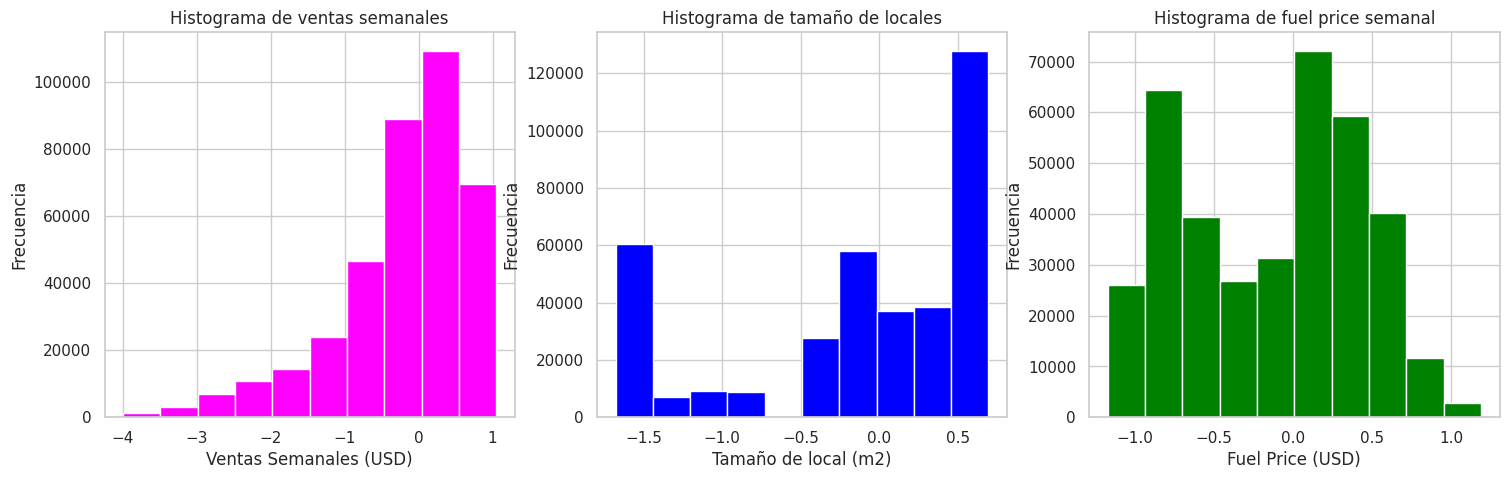

In [ ]:
#Observar como las variables quedan expresadas dentro de rangos similares

f, axs = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw=dict(width_ratios=[4, 4,4]))

sns.set_theme(style="whitegrid")

axs[0].hist(x= df_escalado.Weekly_Sales, bins=None, density=False, orientation='vertical', color='magenta')
axs[0].set_xlabel('Ventas Semanales (USD)')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Histograma de ventas semanales')

axs[1].hist(x= df_escalado.Size, bins=None, density=False, orientation='vertical', color='blue')
axs[1].set_xlabel('Tamaño de local (m2)')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Histograma de tamaño de locales')

axs[2].hist(x= df_escalado.Fuel_Price, bins=None, density=False, orientation='vertical', color='green')
axs[2].set_xlabel('Fuel Price (USD)')
axs[2].set_ylabel('Frecuencia')
axs[2].set_title('Histograma de fuel price semanal')

# Data wrangling ✅
---
En esta seccion del proyecto, vamos a buscar valores nulos, duplicados y a revisar que nuestras variables tengan el formato deseado, para poder aplicar luego el modelo que escojamos. 


In [ ]:
#Conteo de variables: para que nuestro modelo funcione, debemos tener la misma cantidad de datos en cada feature o columna del data frame

cant_datos = df_escalado.count()

if (cant_datos == cant_datos.max()).all():
    print("Todas las columnas tienen la misma cantidad de datos.")
else:
    columnas_con_menos_datos = cant_datos[cant_datos < cant_datos.max()]
    for columna in columnas_con_menos_datos.index:
        print("La columna {} tiene menos datos que las demás.".format(columna))


Todas las columnas tienen la misma cantidad de datos.


In [ ]:
#Valores nulos

null_counts = df_escalado.isnull().sum()

for col in null_counts.index:
    if null_counts[col] > 0:
        print(f"Column '{col}' contiene {null_counts[col]} valores nulos.")
    else:
        print(f"Column '{col}' no contiene valores nulos.")


Column 'Weekly_Sales' no contiene valores nulos.
Column 'Size' no contiene valores nulos.
Column 'Temperature' no contiene valores nulos.
Column 'Fuel_Price' no contiene valores nulos.
Column 'CPI' no contiene valores nulos.
Column 'Unemployment_Rate' no contiene valores nulos.


In [ ]:
#Valores duplicados

null_counts = df_escalado.isnull().sum()

for col in null_counts.index:
    if null_counts[col] > 0:
        print(f"Column '{col}' contiene {null_counts[col]} valores duplicados.")
    else:
        print(f"Column '{col}' no contiene valores duplicados.")


Column 'Weekly_Sales' no contiene valores duplicados.
Column 'Size' no contiene valores duplicados.
Column 'Temperature' no contiene valores duplicados.
Column 'Fuel_Price' no contiene valores duplicados.
Column 'CPI' no contiene valores duplicados.
Column 'Unemployment_Rate' no contiene valores duplicados.


In [ ]:
#Tipos de datos: si queremos aplicar un modelo de regresion, tenemos que tener variables numericas. Si tenemos variables categoricas, 
#podemos transformarlas en valores booleanos. En este caso, son todas numericas del tipo float. 

print(df_escalado.dtypes)


Weekly_Sales         float64
Size                 float64
Temperature          float64
Fuel_Price           float64
CPI                  float64
Unemployment_Rate    float64
dtype: object


In [ ]:
#Cantidad de datos por año: como nuestro data frame esta indexado por fechas, puede ser util saber que cantidad de datos tenemos para cada año, 
#para poder contextualizar el analisis en un momento determinado. Para expresarlo de una manera practica, los datos se muestran como
# un % del total. 


# No hay diferencias significativas en la cantidad de ventas en cada año

tabla_dinamica = pd.pivot_table(df_1, values='Weekly_Sales', columns=['Year'], aggfunc=lambda x: round((x.sum() / df_1['Weekly_Sales'].sum()) * 100, 2))

print(tabla_dinamica)



Year           2019  2020   2021
Weekly_Sales  34.72  35.2  30.08


# Eleccion del modelo ✅

Dado que tenemos datos cuantitativos y el objetivo del negocio es poder cuantificar la inlfuencia de ciertas variables sobre las ventas semanales, el algoritmo que creemos es mas adecuado para el caso, es una regresion lineal multiple. Vamos a probar el modelo en ambos casos de transformacion/escalacion, elegiremos el que tenga el coeficiente de determinacion mas alto (y por ende explique mejor el comportamiento de la variable objetivo) y luego obtendremos algunas metricas y testearemos el modelo.

In [ ]:
#Definicion de variable objetivo y variables "explicativas"


X = df_escalado.drop("Weekly_Sales", 1)       # feature matrix
y = df_escalado['Weekly_Sales']               # target feature

<ipython-input-22-a5628f938d8b>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_escalado.drop("Weekly_Sales", 1)       # feature matrix


In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
#Desarrollo del modelo

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,shuffle=True)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
#Obtencion del coeficiente de correlacion

from sklearn.metrics import r2_score
r2_a = r2_score(y_test,y_pred)
print(r2_a)

0.09846429806268964


## Coeficiente de correlacion 1:

---



El 9.84% de las variaciones de las ventas semanales es explicado por el CPI, el indice de desempleo, el precio de la nafta, la temperatura ambiente y el tamaño del local donde se realiza la venta.


In [ ]:
#Transformacion box-cox (requiere re importacion del dataset dado que no admite valores no positivos y python no los estaba pudiendo identificar. Se limpiaron previamente en excel)

#Importando el DF
from google.colab import drive
import os
drive.mount('/content/drive',force_remount=True)
df_3=pd.read_csv('/content/drive/MyDrive/Data science - Sere/Data Science/Datasets/Datos_positivos.csv')
df_3.index = df_3['Date']

Mounted at /content/drive


In [ ]:
df_3 = df_3.rename (columns= {'Unemployment': 'Unemployment_Rate' }) 
df_3.head()

,Date,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment_Rate,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
5/2/2019,5/2/2019,31,99,0.01,A,203750,39.05,2.572,210.752605,8.324,0,2019,2,5,4380.01,0.01,218.742203,10.050,643.554673,0.0
12/2/2019,12/2/2019,31,99,0.01,A,203750,37.77,2.548,210.897994,8.324,1,2019,2,6,4380.01,0.01,218.742203,10.050,643.554673,0.0
19/02/2019,19/02/2019,19,99,0.01,A,203819,28.57,2.909,131.637000,8.350,0,2019,2,7,5300.00,0.01,440.374878,85.000,933.805200,0.0
5/3/2019,5/3/2019,44,99,0.01,C,39910,40.65,2.681,126.578286,8.119,0,2019,3,9,7.00,0.01,3.505000,3.505,4.942676,0.0
5/3/2019,5/3/2019,20,99,0.01,A,203742,31.75,2.777,204.494073,8.187,0,2019,3,9,12550.00,0.01,796.153864,105.050,2121.611425,0.0


In [ ]:
#Seleccion de variables significativas

df_4 = df_3[[
  'Weekly_Sales',
  'Size',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment_Rate']]

df_4.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment_Rate
Date,,,,,,
5/2/2019,0.01,203750,39.05,2.572,210.752605,8.324
12/2/2019,0.01,203750,37.77,2.548,210.897994,8.324
19/02/2019,0.01,203819,28.57,2.909,131.637000,8.350
5/3/2019,0.01,39910,40.65,2.681,126.578286,8.119
5/3/2019,0.01,203742,31.75,2.777,204.494073,8.187


In [ ]:
print(df_4.dtypes)

Weekly_Sales         float64
Size                   int64
Temperature          float64
Fuel_Price           float64
CPI                  float64
Unemployment_Rate    float64
dtype: object


In [ ]:
#Transformacion box-cox
from scipy import stats

datos_bc=pd.DataFrame()
for j in df_4.columns[0:]:
  datos_bc[j], lambda_optimal = stats.boxcox(df_4[j], lmbda=None)
datos_bc.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment_Rate
0,-2.736653,236694.817929,96.211145,1.733491,14.757293,8.129021
1,-2.736653,236694.817929,92.022525,1.705141,14.761356,8.129021
2,-2.736653,236776.044922,63.338011,2.136363,12.190080,8.159404
3,-2.736653,45364.559559,101.509890,1.862830,11.993839,7.889706
4,-2.736653,236685.400330,72.956889,1.977519,14.580579,7.969040


Text(0.5, 1.0, 'Histograma de fuel price semanal')

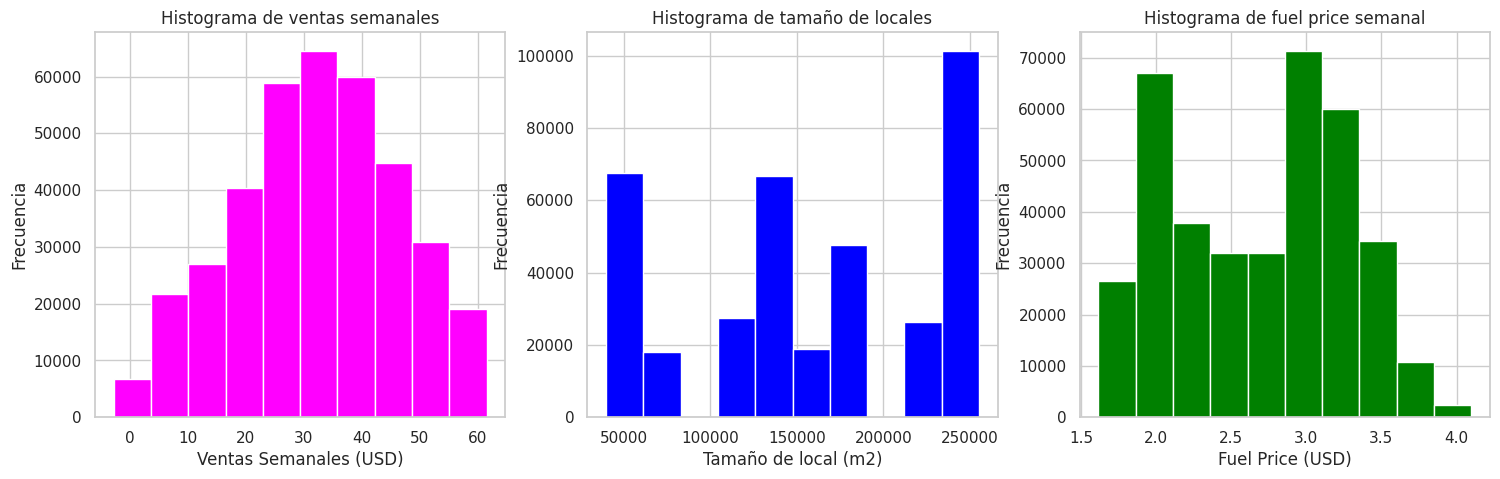

In [ ]:
#Observar como las variables se asemejan mas a una distribucion normal (donde los datos lo permiten)


f, axs = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw=dict(width_ratios=[4, 4,4]))

sns.set_theme(style="whitegrid")

axs[0].hist(x= datos_bc.Weekly_Sales, bins=None, density=False, orientation='vertical', color='magenta')
axs[0].set_xlabel('Ventas Semanales (USD)')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Histograma de ventas semanales')

axs[1].hist(x= datos_bc.Size, bins=None, density=False, orientation='vertical', color='blue')
axs[1].set_xlabel('Tamaño de local (m2)')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Histograma de tamaño de locales')

axs[2].hist(x= datos_bc.Fuel_Price, bins=None, density=False, orientation='vertical', color='green')
axs[2].set_xlabel('Fuel Price (USD)')
axs[2].set_ylabel('Frecuencia')
axs[2].set_title('Histograma de fuel price semanal')

In [ ]:
#Aplicacion del standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

bc_escalado = pd.DataFrame(scaler.fit_transform(datos_bc), columns=datos_bc.columns)

bc_escalado.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment_Rate
0,-2.495084,1.138579,-1.176571,-1.655552,0.962151,0.447183
1,-2.495084,1.138579,-1.239140,-1.704686,0.965389,0.447183
2,-2.495084,1.139722,-1.667627,-0.957310,-1.083669,0.466018
3,-2.495084,-1.554419,-1.097419,-1.431387,-1.240054,0.298829
4,-2.495084,1.138446,-1.523941,-1.232612,0.821327,0.348009


In [ ]:
#Definicion de variable objetivo y variables "explicativas"

X1 = bc_escalado.drop("Weekly_Sales", 1)       # feature matrix
y1 = bc_escalado['Weekly_Sales']               # target feature

<ipython-input-34-79dfece49c4c>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1 = bc_escalado.drop("Weekly_Sales", 1)       # feature matrix


In [ ]:
#Desarrollo del modelo

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=2,shuffle=True)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_b = r2_score(y_test,y_pred)
print(r2_b)

0.08418434162634836


## Coeficiente de correlacion 2:

---



El 8.41% de las variaciones de las ventas semanales es explicado por el CPI, el indice de desempleo, el precio de la nafta, la temperatura ambiente y el tamaño del local donde se realiza la venta.


In [ ]:
#Eleccion de la tecnica de escalacion y tranformacion en base a los resultados del modelo

if r2_a > r2_b:
    print("usar caso 1")
else:
    print("usar caso 2")

usar caso 1


# Validacion del Modelo y desarrollo de metricas ✅

---

In [ ]:
#Modelo linear caso 1, fit con X test

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,shuffle=True)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)
print("MAE:", mae)

MSE: 0.7147176919184332
R²: 0.09846429806268964
MAE: 0.6388153980203727


In [ ]:
#Coeficientes:

print('Coeficientes:', model.coef_)

Coeficientes: [ 0.35872352 -0.00500663 -0.02110137 -0.0131792  -0.02193919]


In [ ]:
#plt.scatter(x, y, color='blue', label='Actual Data')

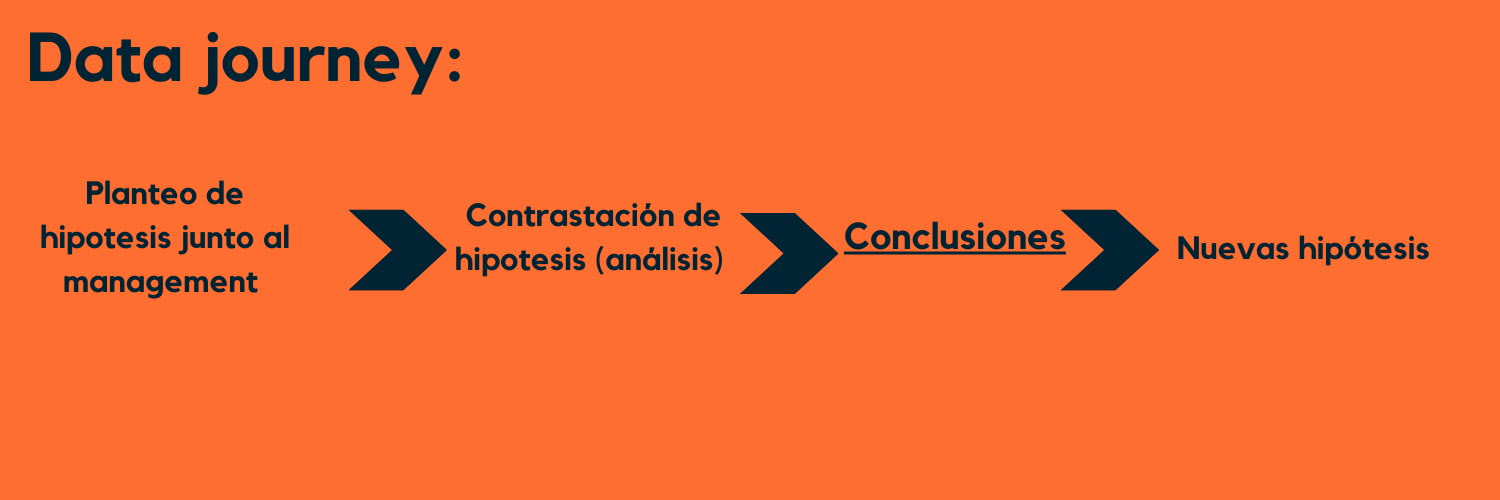

### Conclusiones sobre las metricas del modelo:

---
✅

1) Error cuadratico medio (MSE):  El objetivo de nuestra funcion es minimizar el MSE, es decir la distancia al cuadrado entre la variable "real" y la estimada. En este caso, la capacidad del modelo de minimizar el MSE es alta.

2) Coeficiente de correlacion: si bien, como se menciono anteriormente, solo el 9.84% de las variaciones de las ventas semanales de las tiendas fisicas de Amazon es explicado por el CPI, el indice de desempleo, el precio de la nafta, la temperatura ambiente y el tamaño del local donde se realiza la venta, es el resultado optimo que pudimos obtener con las variables brindadas.

3) Error absoluto medio (MAE): El objetivo de nuestra funcion es minimizar el MAE, es decir la distancia absoluta entre la variable "real" y la estimada. En este caso, la capacidad del modelo de minimizar el MAE es alta.


### Conclusiones sobre las hipotesis del modelo:

---
✅


❗ Hipotesis 1: el CPI tiene una influencia negativa en las ventas semanales. Esto puede traducirse en que el beta o coeficiente asociado al CPI es negativo.


Dato observacional: el coeficiente que acompaña al CPI es negativo e indica que tiene una influencia inversa sobre las ventas semanales cercana a 1.31%  --> rechazamos la hipotesis alternativa. 



❗ Hipotesis 2: el tamaño de la tienda no influye en las ventas semanales. 

Dato observacional: el coeficiente que acompaña el tamaño de la tienda no solo no es cero sino que es positivo y se acerca a 0.35. Esto quiere decir que el tamaño de la tienda influye de manera directa en las ventas semanales. --> se rechaza hipotesis alternativa.


❗ Hipotesis 3: el precio de la nafta (fuel) influye de manera negativa en las ventas. El management afirma que la localizacion de los locales en lugares suburbanos es una ventaja y una desventaja al mismo tiempo, poruqe las recientes subas del precio de la nafta generan que las personas decidan acudir a tiendas a las que puedan ir caminando.

Dato observacional: el coeficiente que acompaña al precio de la nafta es significativo y negativo, por lo cual el management esta en lo correcto y estamos en condiciones de rechazar la hipotesis alternativa.


❗ Hipotesis 4: la temperatura atmosferica promedio no influye en las ventas semanales.

Dato observacional: el coeficiente que acompaña a la temperatura si bien es cercano a cero, nos indica una relacion inversa entre temperatura y ventas semanales. A mayor temperatura, menores ventas --> rechazamos hipotesis alternativa. 


❗ Hipotesis 5: el indice de desempleo influye de manera negativa en las ventas. 

Dato observacional: el indice de desempleo afecta de manera inversa en aproximadamente un 2.1% a las ventas semanales. Es decir, si el indice de desempleo aumenta en una unidad, las ventas semanales caeran en un 2.1%. Entonces, estamos en condiciones de rechazar la hipotesis alternativa.

In [ ]:
#Modelo linear caso 1, fit con X train

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,shuffle=True)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_test, y_pred)

print("MSE train:", mse_train)
print("R² train:", r2_train)
print("MAE:", mae_train)

MSE train: 0.7149841195941056
R² train: 0.09704700341732486
MAE: 0.6388153980203727


## Conclusion sobre la capacidad de ajuste del modelo : situacion de underfitting

Si bien los parametros MAE y MSE son los esperados para un modelo lineal que se ajusta bien a los datos, el coeficiente de determnacion esta cerca del 10% tanto al entrenar el modelo como al testearlo. Podemos afirmar entonces que solo el 10% de las variaciones en las ventas semanales pueden ser explicadas por las variables que contiene nuestro modelo. Si bien es un caso de "subajuste", es el mejor resultado obtenido con los datos disponibles. 

Se plantea al cliente que se podrian sumar variables al modelo para aumentar su capacidad de explicacion de la variable objetivo. Continuacion en proceso.

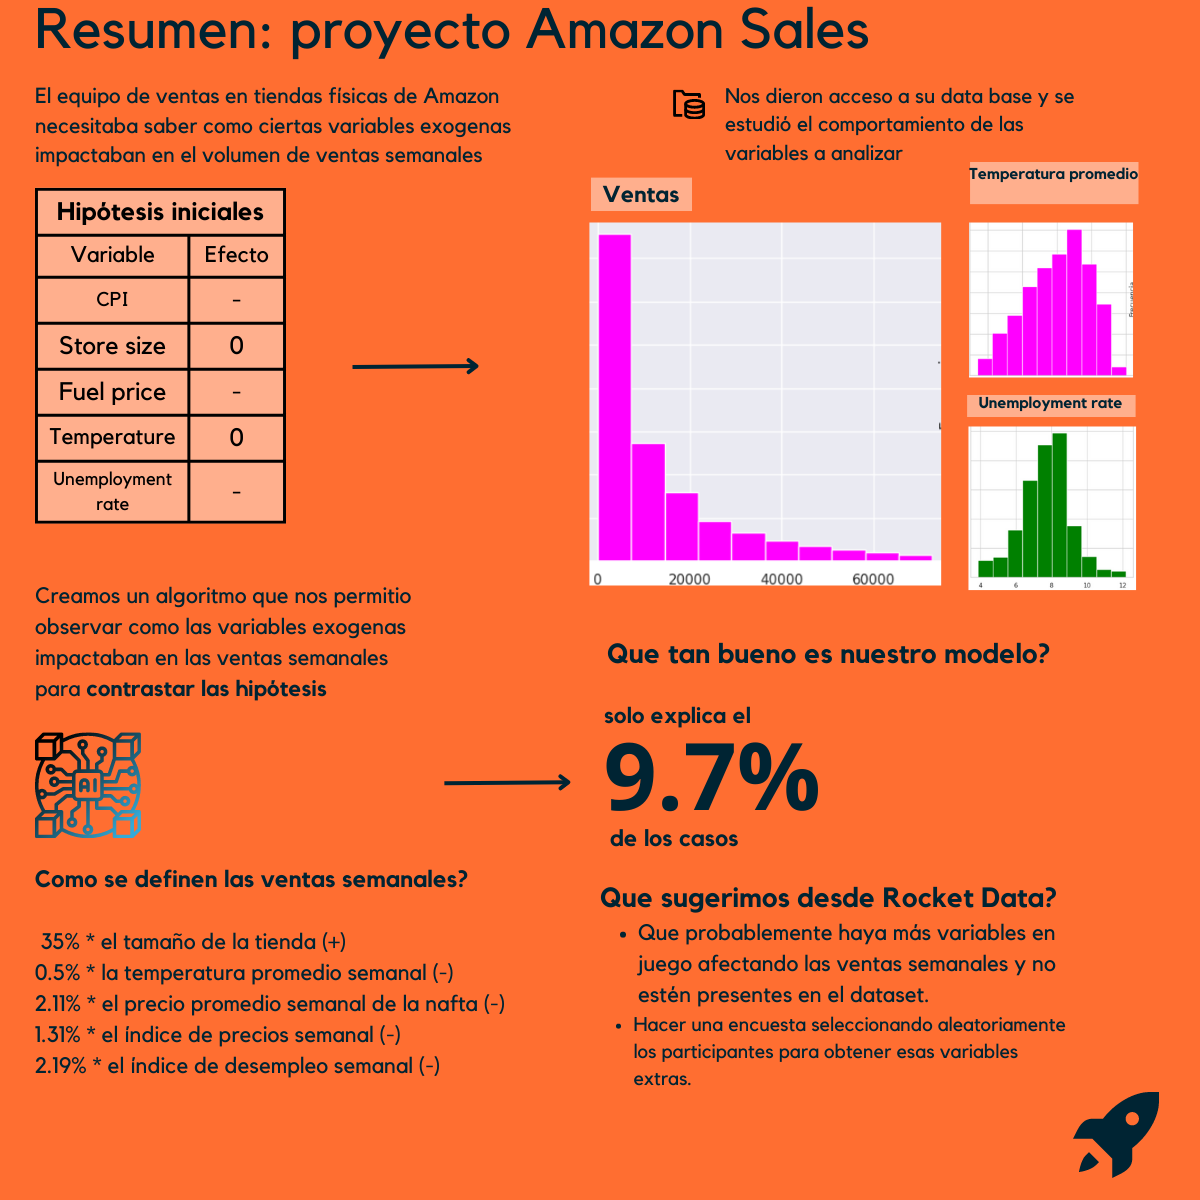